In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hipp_train = pd.read_csv('train_radiomics_hipocamp.csv')
hipp_test = pd.read_csv('test_radiomics_hipocamp.csv')
df = pd.read_csv('train_radiomics_hipocamp.csv')

hipp_train.head()


,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.007881,345733.167092,479.414935,0.001538,0.183049,0.017044,0.001581,0,77.1,CN-CN
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.013112,244310.331892,378.001763,0.001761,0.146021,0.010782,0.001813,1,83.4,CN-CN
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.011331,222776.529605,497.261162,0.001567,0.190309,0.019644,0.001596,1,81.3,AD-AD
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.012197,280222.663268,406.837667,0.001629,0.148247,0.010824,0.001677,1,79.6,CN-MCI
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,0.010859,216779.591479,368.838125,0.001912,0.174701,0.014793,0.001979,0,80.1,CN-CN


In [12]:
print("Este dataset tem {} colunas e {} linhas".format(df.shape[1],df.shape[0]))
df.describe()


Este dataset tem 2181 colunas e 305 linhas


#Informação do Dataframe

Permite Visualizar tipos de dados e um resumo da informação

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


In [14]:
df.nunique()

ID                                  305
Image                               305
Mask                                305
diagnostics_Versions_PyRadiomics      1
diagnostics_Versions_Numpy            1
                                   ... 
lbp-3D-k_ngtdm_Contrast             305
lbp-3D-k_ngtdm_Strength             305
Sex                                   2
Age                                 184
Transition                            5
Length: 2181, dtype: int64

Verificamos que temos alguns features que têm sempre o mesmo valor tal como diagnostics_Versions_PyRadiomics que não é relevante para o estudo do modelo


In [ ]:
print(df.isna().sum())

In [6]:
#Ver todas as colunas
columns_list = df.columns.tolist()
print(columns_list)

['ID', 'Image', 'Mask', 'diagnostics_Versions_PyRadiomics', 'diagnostics_Versions_Numpy', 'diagnostics_Versions_SimpleITK', 'diagnostics_Versions_PyWavelet', 'diagnostics_Versions_Python', 'diagnostics_Configuration_Settings', 'diagnostics_Configuration_EnabledImageTypes', 'diagnostics_Image-original_Hash', 'diagnostics_Image-original_Dimensionality', 'diagnostics_Image-original_Spacing', 'diagnostics_Image-original_Size', 'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Minimum', 'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_Hash', 'diagnostics_Mask-original_Spacing', 'diagnostics_Mask-original_Size', 'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_VoxelNum', 'diagnostics_Mask-original_VolumeNum', 'diagnostics_Mask-original_CenterOfMassIndex', 'diagnostics_Mask-original_CenterOfMass', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DD

In [3]:

#Atençao isto é só para testar o split, depois temos de fazer o split com o dataset todo
colunas_remover = ['Image', 'diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash',
                   'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex',
                   'diagnostics_Mask-original_CenterOfMass', 'Mask']
df = df.drop(columns=colunas_remover, errors='ignore').loc[:, df.nunique() > 1]
hipp_test = hipp_test.drop(columns=colunas_remover, errors='ignore').loc[:, hipp_test.nunique() > 1]

In [8]:
columns_list = df.columns.tolist()
print(columns_list)

['ID', 'diagnostics_Image-original_Mean', 'diagnostics_Image-original_Maximum', 'diagnostics_Mask-original_VoxelNum', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_

C:\Users\Diogo\AppData\Local\Temp\ipykernel_31336\293152661.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')


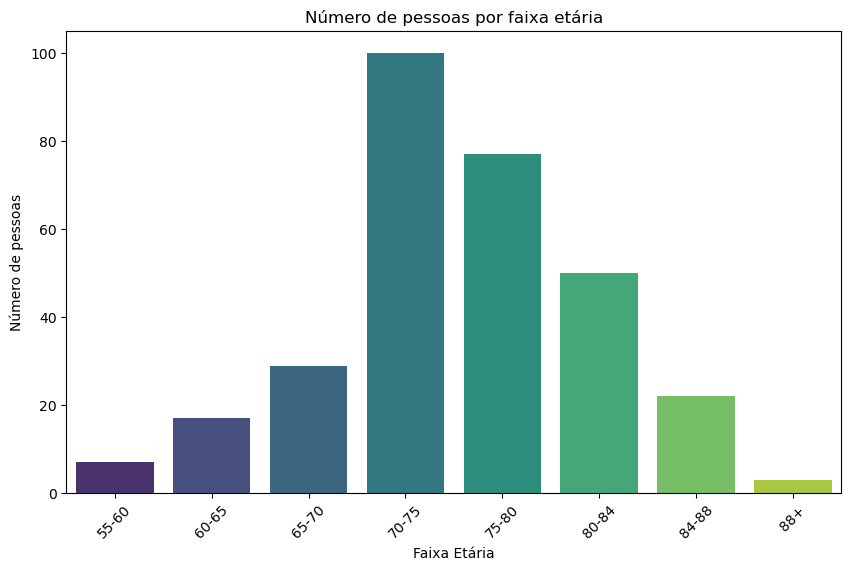

In [14]:
#Numero de pessoas por idade

bins = [55, 60, 65, 70, 75, 80, 84, 88, np.inf]  # Define the edges of the bins
labels = ['55-60', '60-65', '65-70', '70-75', '75-80', '80-84', '84-88','88+']  # Labels for the bins

# Create the AgeRange column using pd.cut
df['AgeRange'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Count the number of people in each bin
age_group_counts = df['AgeRange'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')
plt.title('Número de pessoas por faixa etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de pessoas')
plt.xticks(rotation=45)
plt.show()


original_glszm_LargeAreaEmphasis - Reflects larger homogeneous zones. Decreases may indicate fragmentation.
Ou seja isto indica fragmentação vamos ver este atributo

C:\Users\Diogo\AppData\Local\Temp\ipykernel_31336\2382870098.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_means = df.groupby('AgeRange')['original_glszm_LargeAreaEmphasis'].mean()
C:\Users\Diogo\AppData\Local\Temp\ipykernel_31336\2382870098.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_means.index, y=range_means.values, palette='viridis')


AgeRange
55-60    145938.917628
60-65    180719.127134
65-70    126595.298505
70-75    147450.810237
75-80    127263.521457
80-84    117426.272658
84-88    121890.831536
88+      135908.939881
Name: original_glszm_LargeAreaEmphasis, dtype: float64


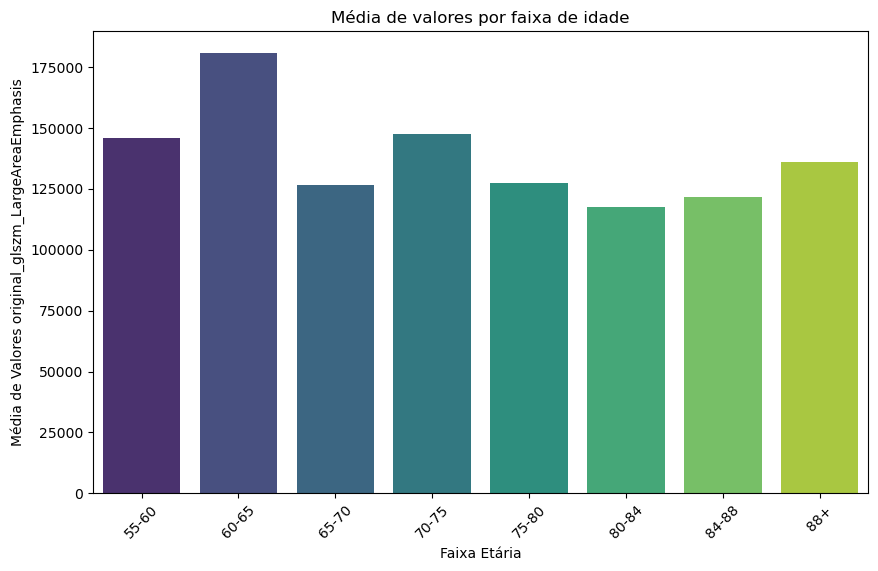

In [15]:

# Agrupa os dados por faixa etária e calcula a média
#Só tens de mudar o original_glszm_LargeAreaEmphasis para a feature que queres ver, o resto é igual
range_means = df.groupby('AgeRange')['original_glszm_LargeAreaEmphasis'].mean()

# Basicamente calcula a média do valor da feature para cada faixa etária

# Exibe os resultados
print(range_means)

# Plotando os resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=range_means.index, y=range_means.values, palette='viridis')
plt.title('Média de valores por faixa de idade')
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Valores original_glszm_LargeAreaEmphasis')
plt.xticks(rotation=45)
plt.show()


C:\Users\Diogo\AppData\Local\Temp\ipykernel_31336\2387983645.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(['AgeRange', 'Transition']).size().unstack(fill_value=0)


Transition  AD-AD  CN-CN  CN-MCI  MCI-AD  MCI-MCI
AgeRange                                         
55-60           4      1       0       1        1
60-65           1      2       0       5        9
65-70           9      3       0      10        7
70-75          16     41       5      18       20
75-80          13     27       4      16       17
80-84           9     14       1      12       14
84-88           8      7       0       4        3
88+             0      1       0       2        0


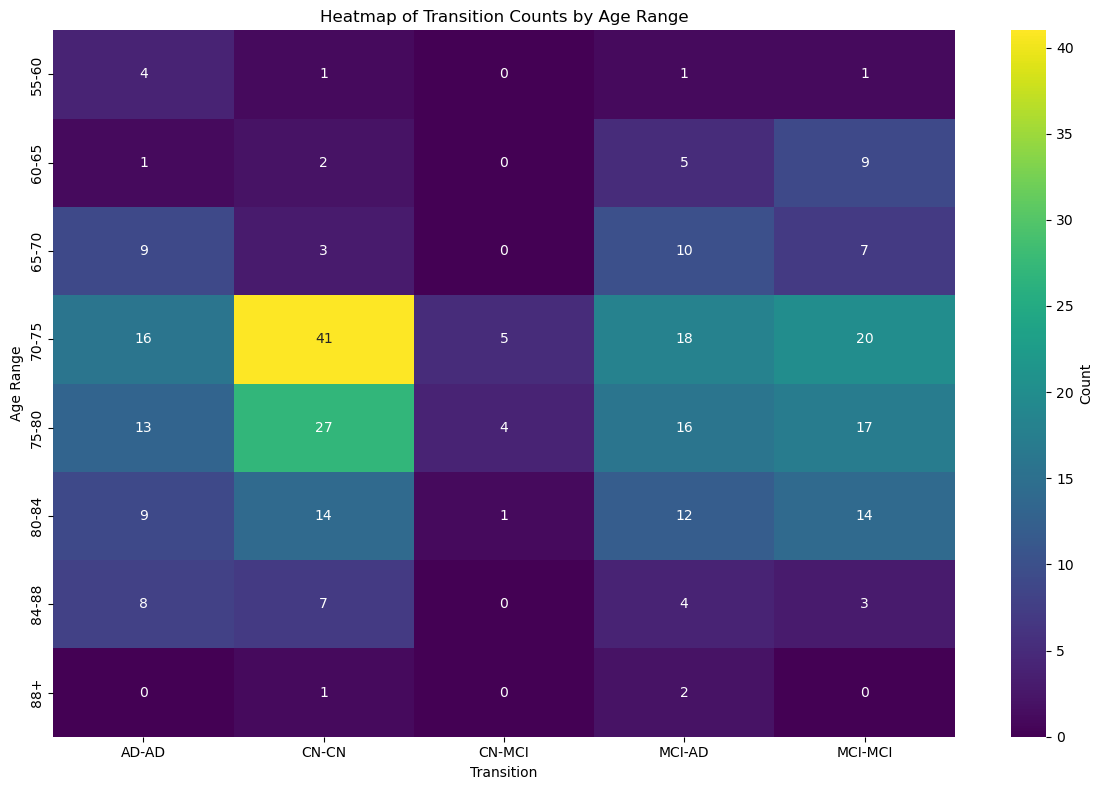

In [18]:
counts = df.groupby(['AgeRange', 'Transition']).size().unstack(fill_value=0)
print(counts)

plt.figure(figsize=(12, 8))
sns.heatmap(counts, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Transition Counts by Age Range')
plt.xlabel('Transition')
plt.ylabel('Age Range')
plt.tight_layout()
plt.show()

C:\Users\Diogo\AppData\Local\Temp\ipykernel_38536\1218485528.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transition', y='original_glszm_LargeAreaEmphasis', data=df, ax=axs[0, 0], palette='viridis')
C:\Users\Diogo\AppData\Local\Temp\ipykernel_38536\1218485528.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transition', y='original_shape_MeshVolume', data=df, ax=axs[0, 1], palette='viridis')
C:\Users\Diogo\AppData\Local\Temp\ipykernel_38536\1218485528.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transition', y='ori

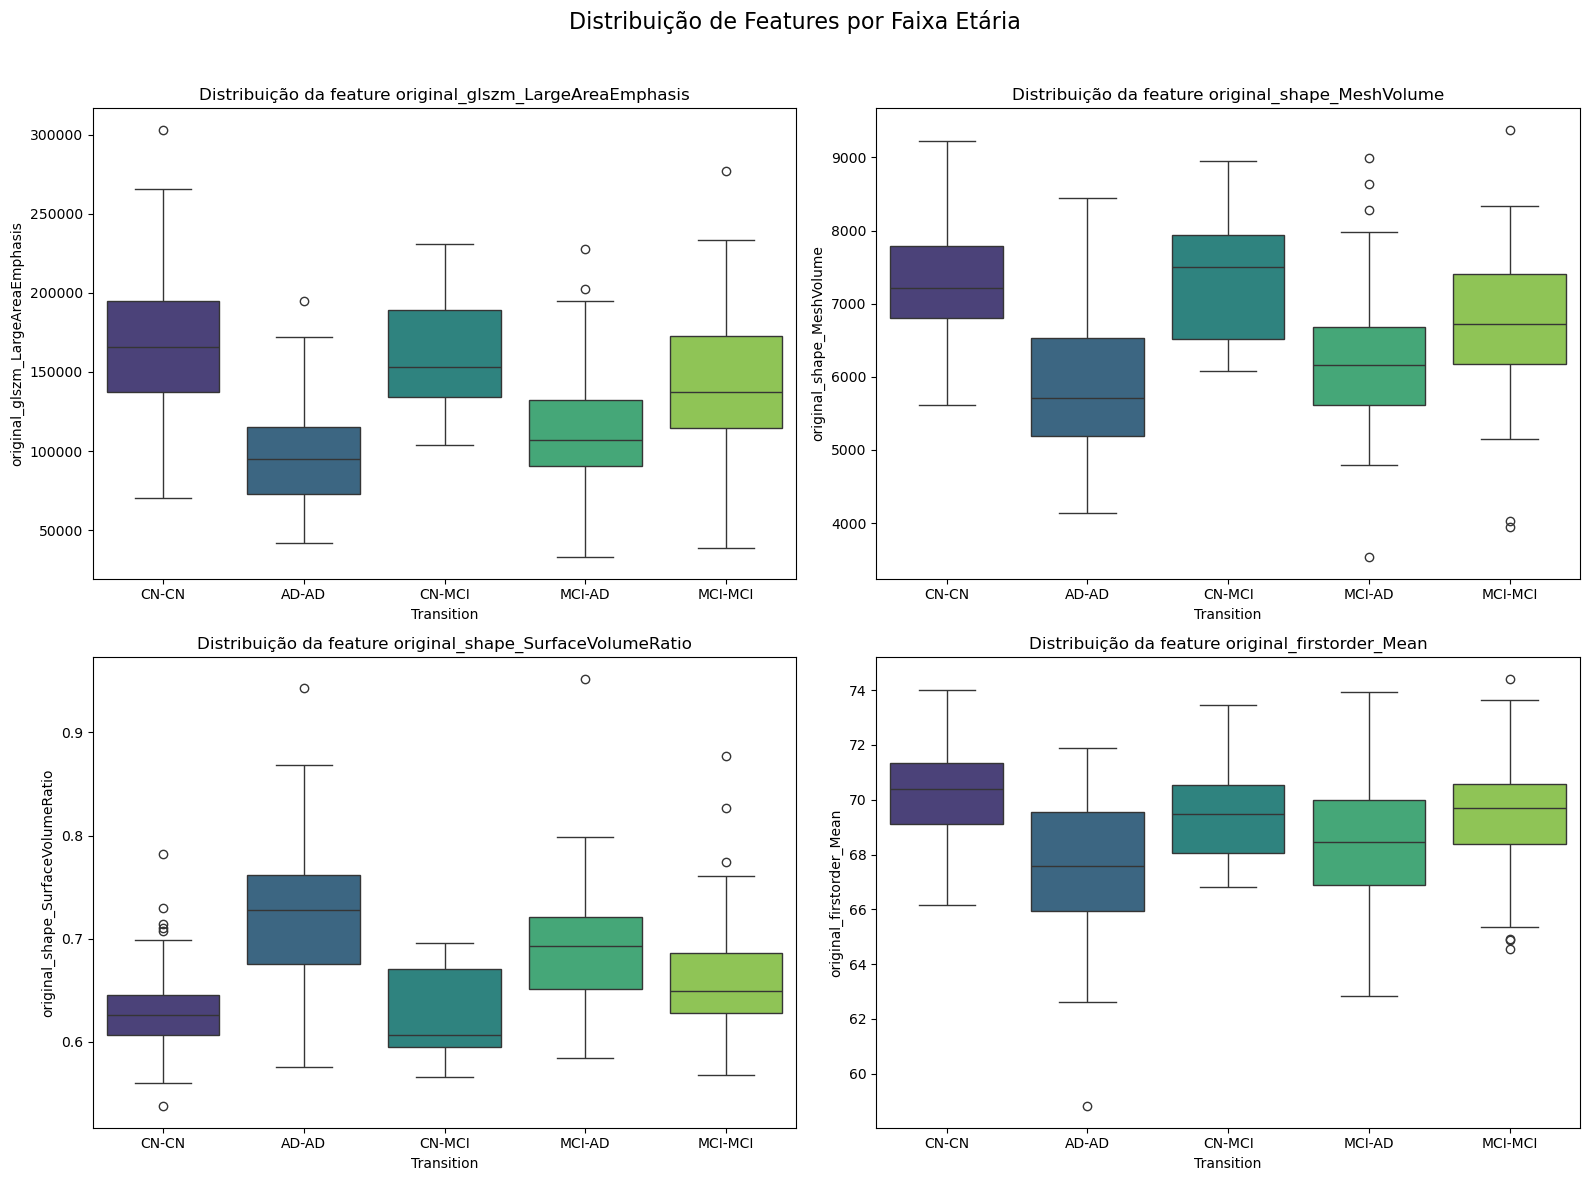

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuição de Features por Faixa Etária', fontsize=16)

# Plot each variable on a separate subplot
sns.boxplot(x='Transition', y='original_glszm_LargeAreaEmphasis', data=df, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Distribuição da feature original_glszm_LargeAreaEmphasis')

sns.boxplot(x='Transition', y='original_shape_MeshVolume', data=df, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Distribuição da feature original_shape_MeshVolume')

sns.boxplot(x='Transition', y='original_shape_SurfaceVolumeRatio', data=df, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Distribuição da feature original_shape_SurfaceVolumeRatio')

sns.boxplot(x='Transition', y='original_firstorder_Mean', data=df, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('Distribuição da feature original_firstorder_Mean')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # To make space for the suptitle
plt.show()

In [11]:
#Pensar em implementar o PCA para reduzir a dimensionalidade, ver quais as features mais importantes e depois fazer o split


NameError: name 'axs' is not defined

In [ ]:
hipp_train['Transition'] = pd.factorize(hipp_train['Transition'])[0] + 1
#Torna o label de categorico para numerico
hipp_train.describe()

,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age,Transition
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148,2.862295
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866,1.612264
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000,1.000000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000,1.000000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000,2.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000,4.000000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000,5.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
import xgboost as xgb

#Atençao isto é só para testar o split, depois temos de fazer o split com o dataset todo
colunas_remover = ['Image', 'diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash',
                   'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex',
                   'diagnostics_Mask-original_CenterOfMass', 'Mask']
hipp_train = hipp_train.drop(columns=colunas_remover, errors='ignore').loc[:, hipp_train.nunique() > 1]
hipp_test = hipp_test.drop(columns=colunas_remover, errors='ignore').loc[:, hipp_test.nunique() > 1]


X = hipp_train.drop(['Transition', 'ID'], axis=1)
y = hipp_train['Transition']

# label_encoder = LabelEncoder()
# y= label_encoder.fit_transform(y)
# Dividir o conjunto de treino em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

## Ver a learning curve para perceber a quantos epochs causa overfitting por exemplo
# Temos de testar como temos aqui



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.2, size=x.shape)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Fit polynomial regression models of different degrees
degrees = [1, 3, 10, 20]
train_errors = []
test_errors = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train[:, np.newaxis])
    x_poly_test = poly_features.transform(x_test[:, np.newaxis])
    
    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    
    train_predictions = model.predict(x_poly_train)
    test_predictions = model.predict(x_poly_test)
    
    train_errors.append(mean_squared_error(y_train, train_predictions))
    test_errors.append(mean_squared_error(y_test, test_predictions))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.title('Learning Curves')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Logistic Regression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=2021)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

if len(y_pred) < 100:
    additional_predictions = np.random.choice(y_pred, 100 - len(y_pred), replace=True)
    y_pred = np.concatenate([y_pred, additional_predictions])

# Create the DataFrame with exactly 100 predictions
df = pd.DataFrame({
    "RowId": range(1, 101),  # RowId starting from 1 to 100
    "Result": y_pred[:100]   # Ensure 100 predictions by taking only the first 100
})
# Save the DataFrame to a CSV file
df.to_csv("predictions.csv", index=False)

if len(df) < 100:
    print("Aviso: O conjunto de teste contém menos de 100 entradas. Submissão terá apenas", len(df), "previsões.")
else:
    print("Número total de previsões:", len(df))

print("Predictions saved to 'predictions.csv'")


c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.3695652173913043
              precision    recall  f1-score   support

       AD-AD       0.35      0.44      0.39        18
       CN-CN       0.56      0.50      0.53        30
      CN-MCI       0.00      0.00      0.00         5
      MCI-AD       0.24      0.20      0.22        20
     MCI-MCI       0.28      0.37      0.32        19

    accuracy                           0.37        92
   macro avg       0.28      0.30      0.29        92
weighted avg       0.36      0.37      0.36        92

Número total de previsões: 100
Predictions saved to 'predictions.csv'


c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

In [8]:
#Decision Tree
from sklearn.calibration import LabelEncoder
import xgboost as xgb

from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale', random_state=2021))

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

if len(y_pred) < 100:
    additional_predictions = np.random.choice(y_pred, 100 - len(y_pred), replace=True)
    y_pred = np.concatenate([y_pred, additional_predictions])

# Create the DataFrame with exactly 100 predictions
df = pd.DataFrame({
    "RowId": range(1, 101),  # RowId starting from 1 to 100
    "Result": y_pred[:100]   # Ensure 100 predictions by taking only the first 100
})
# Save the DataFrame to a CSV file
df.to_csv("predictions.csv", index=False)

if len(df) < 100:
    print("Aviso: O conjunto de teste contém menos de 100 entradas. Submissão terá apenas", len(df), "previsões.")
else:
    print("Número total de previsões:", len(df))

print("Predictions saved to 'predictions.csv'")

Accuracy: 0.40217391304347827
              precision    recall  f1-score   support

       AD-AD       0.40      0.44      0.42        18
       CN-CN       0.48      0.67      0.56        30
      CN-MCI       0.00      0.00      0.00         5
      MCI-AD       0.31      0.25      0.28        20
     MCI-MCI       0.29      0.21      0.24        19

    accuracy                           0.40        92
   macro avg       0.29      0.31      0.30        92
weighted avg       0.36      0.40      0.37        92

Número total de previsões: 100
Predictions saved to 'predictions.csv'


c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Diogo\miniconda3\envs\envName\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [9]:
# Separate features (X) and target labels (y) USAR ISTO PARA O MODELO DE MACHINE LEARNING
X = hipp_train.drop(columns=['ID','Label'])  # Replace 'Label' with the actual column name for your target
y = hipp_train['Label']                 # Target variable in the training set

X_test = hipp_test.drop(columns=['ID','Label'])    # Features only for testing
y_test = hipp_test['Label']                   # True labels for testing (for evaluation only)

#X_train contains the features (input variables) for training the model.
#y_train contains the target labels (output) that correspond to each row in X_train.
#X_test contains the features for testing how well the model performs on unseen data.
#y_test contains the true labels for the test data, which you use to evaluate the model’s predictions.

KeyError: "['Label'] not found in axis"

In [10]:
df.dtypes
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 2181 entries, ID to Transition
dtypes: float64(2014), int64(147), object(20)
memory usage: 5.1+ MB


,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,...,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength,Sex,Age
count,305.0,305.000000,305.0,305.000000,305.000000,305.0,305.000000,305.000000,305.000000,305.000000,...,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,3.0,5.810469,0.0,173.504918,6714.790164,2.0,0.411819,0.096916,10.137707,104.883349,...,2.681657,0.010477,266015.006289,362.064990,0.002024,0.155767,0.012415,0.002091,0.567213,75.171148
std,0.0,0.613858,0.0,24.108871,1066.815670,0.0,0.028993,0.009739,0.911329,6.180335,...,0.259507,0.002009,59267.210682,102.133366,0.000531,0.024285,0.003814,0.000552,0.496276,6.675866
min,3.0,4.321602,0.0,128.000000,3609.000000,2.0,0.330890,0.075142,8.420713,90.675836,...,1.984788,0.005818,138177.996378,130.618182,0.001137,0.071124,0.002565,0.001168,0.000000,55.300000
25%,3.0,5.317298,0.0,157.000000,5941.000000,2.0,0.392944,0.089977,9.525253,100.501871,...,2.507947,0.009060,225781.559367,285.617369,0.001632,0.140791,0.009751,0.001688,0.000000,71.300000
50%,3.0,5.811449,0.0,172.000000,6723.000000,2.0,0.412479,0.096609,10.106838,104.370667,...,2.688709,0.010580,259226.493061,353.841144,0.001934,0.156580,0.012297,0.001995,1.000000,75.000000
75%,3.0,6.237751,0.0,190.000000,7396.000000,2.0,0.431621,0.102240,10.635093,108.677326,...,2.844025,0.011706,298836.166667,431.288497,0.002305,0.173700,0.015166,0.002373,1.000000,79.900000
max,3.0,7.583210,0.0,255.000000,9453.000000,2.0,0.491496,0.144082,14.370911,126.209296,...,3.494062,0.017015,465865.829238,670.406531,0.004325,0.223273,0.024548,0.004417,1.000000,91.000000


In [ ]:
df.head()

In [ ]:
df.isna().any()
print(df.isna().sum())

In [ ]:
print(df.duplicated().sum())

In [ ]:
# print(df['Target'].value_counts())
df['diagnostics_Image-original_Mean'].hist()
plt.title('Histogram of diagnostics_Image-original_Mean')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False ,cbar=False, cmap='viridis')
plt.show()

In [ ]:
sex_counts = df['Sex'].value_counts()
print(sex_counts)

# secalhar o 1 é mulheres e o 0 é homens tenho que ver isto melhor

In [ ]:
#TEMOS DE TORNAR OS OBJETOS EM VALORES NÙMERICOS PARA PUDERMOS UTILIZAR OS MODELOS DE MACHINE LEARNING
from sklearn.preprocessing import OneHotEncoder


categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))


print(one_hot_df.head())



In [ ]:
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded data : \n{df_encoded}")

In [ ]:


sns.boxplot(x='diagnostics_Image-original_Maximum', y='Transition', data=df)
plt.show()

print(df)

In [ ]:
contador = 0 
for column in hipp_test.columns:
    if hipp_test[column].nunique() == 1: 
        print(f"A coluna: '{column}' tem apenas um valor único.")
        contador +=1
print(f"Colunas com valor 1:{contador}")

In [ ]:
#Verificar as colunas que tem apenas 1 valor 
contador = 0
for column in hipp_train.columns:
    if hipp_train[column].nunique() == 1: 
        print(f"A coluna: '{column}' tem apenas 1 valor único.")
        contador +=1 
print(f"Numero total de colunas de um valor: '{contador}'")

In [ ]:
hipp_train_c = hipp_train.loc[:, hipp_train.nunique() > 1]
colunas_removidas = hipp_train.columns[hipp_train.nunique() == 1]
print(f"Colunas removidas: {colunas_removidas}")

In [ ]:
#Remover os valores nunique de treino
hipp_test_c = hipp_test.loc[:, hipp_test.nunique() > 1]
colunas_removidas = hipp_test.columns[hipp_test.nunique() == 1]
print(f"As colunas que foram removidas '{colunas_removidas}'")

In [ ]:
mapping = {
    'CN-CN': 1,  # Estado Normal
    'CN-MCI': 2,  # Estado Intermediário
    'MCI-MCI': 2,  # Estado Intermediário
    'MCI-AD': 3,  # Demência
    'AD-AD': 3   # Demência
}

# Aplicar o mapeamento à coluna 'Transition'
hipp_train['Transition'] = hipp_train['Transition'].map(mapping)

# Verificar o resultado
# print(hipp_train[['Transition', 'Transition_Numeric']].head())



In [ ]:
hipp_train.head()

In [ ]:
# Separate features (X) and target labels (y) USAR ISTO PARA O MODELO DE MACHINE LEARNING
X_train = hipp_train.drop(columns=['ID','Label'])  # Replace 'Label' with the actual column name for your target
y_train = hipp_train['Label']                 # Target variable in the training set

X_test = hipp_test.drop(columns=['ID','Label'])    # Features only for testing
y_test = hipp_test['Label']                   # True labels for testing (for evaluation only)

#X_train contains the features (input variables) for training the model.
#y_train contains the target labels (output) that correspond to each row in X_train.
#X_test contains the features for testing how well the model performs on unseen data.
#y_test contains the true labels for the test data, which you use to evaluate the model’s predictions.

In [ ]:
from sklearn.model_selection import train_test_split

#Atençao isto é só para testar o split, depois temos de fazer o split com o dataset todo
colunas_remover = ['Image', 'diagnostics_Image-original_Hash', 'diagnostics_Mask-original_Hash',
                   'diagnostics_Mask-original_BoundingBox', 'diagnostics_Mask-original_CenterOfMassIndex',
                   'diagnostics_Mask-original_CenterOfMass', 'Mask']
hipp_train = hipp_train.drop(columns=colunas_remover, errors='ignore').loc[:, hipp_train.nunique() > 1]
hipp_test = hipp_test.drop(columns=colunas_remover, errors='ignore').loc[:, hipp_test.nunique() > 1]


X_train = hipp_train.drop(['Transition', 'ID'], axis=1)
y_train = hipp_train['Transition']

# Dividir o conjunto de treino em treino e teste
X_train_split, X_test, y_train_split, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2021)

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
# Predict on the test set
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Initialize the SVM classifier
clf = DecisionTreeClassifier(random_state=2021)

# Train the model on the training set
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# could not convert string to float: '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/brain.nii.gz
# Evaluate the model's performance
#accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
import pandas as pd

# Example predictions
y_pred = ["CN-CN"] * 100  # Replace with actual predictions

# Create a DataFrame with RowId and Result columns
df = pd.DataFrame({
    "RowId": range(1, len(y_pred) + 1),  # RowId starting from 1
    "Result": y_pred                     # Model predictions
})

# Save the DataFrame to a CSV file
df.to_csv("predictions.csv", index=False)

print("Predictions saved to 'predictions.csv'")